In [356]:
#load Dataset
import pandas as  pd
df=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [357]:
#Check Nan valueS in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [358]:
#unique value in Gander columns
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [359]:
df["Dependents"]=df["Dependents"].replace('3+',3)

#unique value in Dependents columns
df["Dependents"].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [360]:
#Remove NaN values in dataset
df['Gender'].fillna("Male",inplace=True) #Remove NaN values in Gender Feature
df['Married'].fillna("Yes",inplace=True) #Remove NaN values in Married Feature
df['Self_Employed'].fillna("Yes",inplace=True) #Remove NaN values in Self_Employed Feature
df['Dependents'].fillna('0',inplace=True) #Remove NaN values in Dependents Feature
df['LoanAmount'].fillna(df["LoanAmount"].mean(),inplace=True) #Remove NaN values in LoanAmount Feature
df['Loan_Amount_Term'].fillna(df["Loan_Amount_Term"].mean(),inplace=True) #Remove NaN values in Loan_Amount_Term Feature
df['Credit_History'].fillna(1,inplace=True) #Remove NaN values in Credit_History Feature

In [361]:
#unique value in Dependents columns
df["Dependents"].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

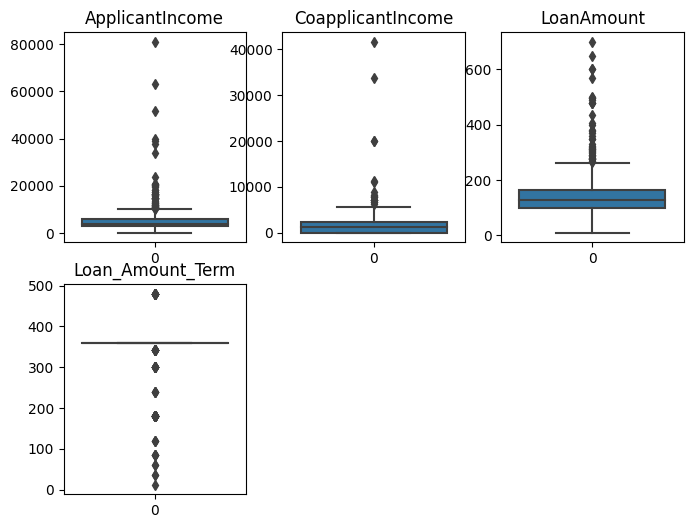

In [362]:
#Create box plot from Check Outlier
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
           
plt.subplot(2, 3, 1) 
sns.boxplot(df['ApplicantIncome'])
plt.title('ApplicantIncome') 

plt.subplot(2, 3, 2)  
sns.boxplot(df['CoapplicantIncome'])
plt.title('CoapplicantIncome')

plt.subplot(2, 3, 3)
sns.boxplot(df['LoanAmount'])
plt.title('LoanAmount') 

plt.subplot(2, 3, 4)
sns.boxplot(df['Loan_Amount_Term'])
plt.title('Loan_Amount_Term') 

plt.show()  # Display the plots


In [363]:
#funtion for outlier remover
import seaborn as sns
def outLier_remover(dataset, column,max_quantile,min_quantile):
    max=dataset[column].mean() + max_quantile*dataset[column].std()
    min=dataset[column].mean() - min_quantile*dataset[column].std()
    print("Highest allowed",max)
    print("Lowest allowed",min)


    print("len of outlier",len(dataset[(dataset[column] > max) | (dataset[column] < min)]))
    df= dataset[(dataset[column] < max) & (dataset[column] > min)]
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,8))

    plt.subplot(2,2,2)
    sns.boxplot(dataset[column])

    plt.subplot(2,2,4)
    sns.boxplot(df[column])

    plt.show()

    return df

Highest allowed 23730.584303549156
Lowest allowed -3760.1032266931443
len of outlier 8


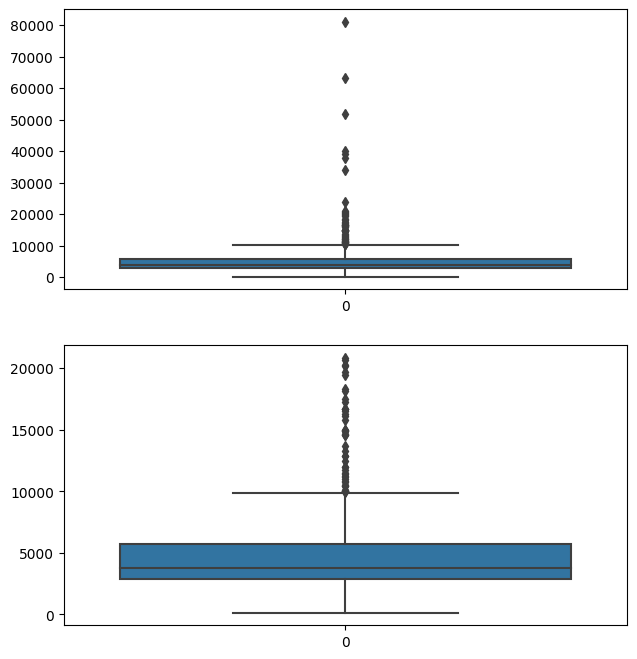

In [364]:
# remve outlayer in ApplicantIncome featuer
y=outLier_remover(df,"ApplicantIncome",3,1.5)
df=y

Highest allowed 10447.55304721918
Lowest allowed -2771.561375122858
len of outlier 6


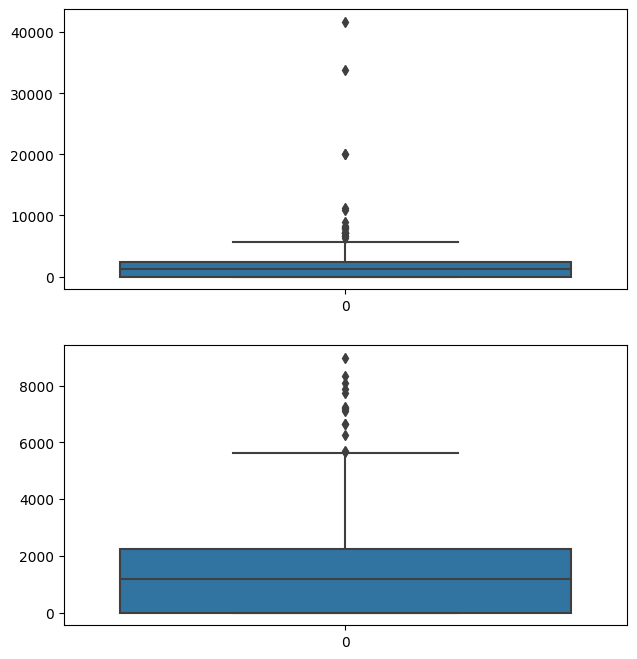

In [365]:
# remve outlayer in CoapplicantIncome featuer
y=outLier_remover(df,"CoapplicantIncome",3,1.5)
df=y

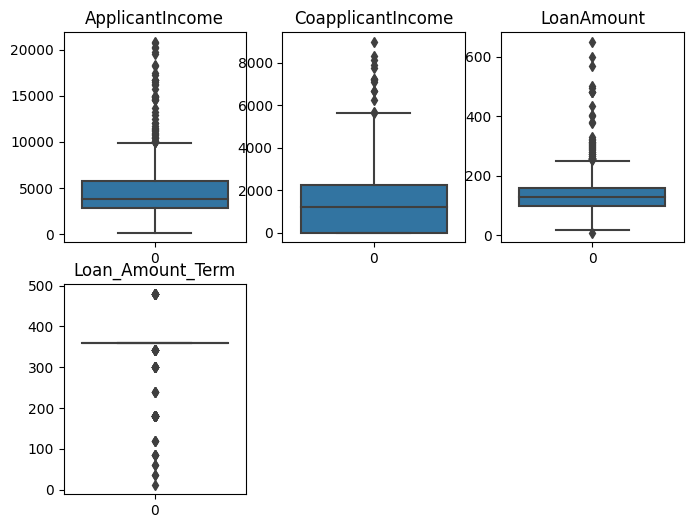

In [366]:
#Check boxplot Graph after removing outliyer
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
           
plt.subplot(2, 3, 1) 
sns.boxplot(df['ApplicantIncome'])
plt.title('ApplicantIncome') 

plt.subplot(2, 3, 2)  
sns.boxplot(df['CoapplicantIncome'])
plt.title('CoapplicantIncome')

plt.subplot(2, 3, 3)
sns.boxplot(df['LoanAmount'])
plt.title('LoanAmount') 

plt.subplot(2, 3, 4)
sns.boxplot(df['Loan_Amount_Term'])
plt.title('Loan_Amount_Term') 

plt.show()  # Display the plots


In [367]:
#Seprate  x and y value from dataset
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [368]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [369]:
#Apply OneHotEncoder, StandardScaler on catagorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

categorical_cols = ['Gender', 'Married','Education', 'Self_Employed', 'Property_Area']
area_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']


# Create ColumnTransformer
transformer = ColumnTransformer(transformers= [
    ('one_hot', OneHotEncoder(sparse=False, dtype=np.int32), categorical_cols),
    ('scaler', StandardScaler(), area_cols)
], remainder='passthrough')


In [370]:
#fit  transformer on data
x=transformer.fit_transform(x)

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [371]:
#save model
import joblib
joblib.dump(transformer, 'transfer.pkl')

['transfer.pkl']

In [372]:
#convert into pandas DataFrame
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,1,0,1,0,1,0,0,0,1,0.28968,-0.844807,0.058531,0.272264,0,1.0
1,0,1,0,1,1,0,1,0,1,0,0,-0.085177,0.051383,-0.187493,0.272264,1,1.0
2,0,1,0,1,1,0,0,1,0,0,1,-0.553898,-0.844807,-1.015936,0.272264,0,1.0
3,0,1,0,1,0,1,1,0,0,0,1,-0.67737,0.556531,-0.294389,0.272264,0,1.0
4,0,1,1,0,1,0,1,0,0,0,1,0.334391,-0.844807,-0.013787,0.272264,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,0,1,0,1,0,1,0,1,0,0,-0.583507,-0.844807,-0.949126,0.272264,0,1.0
596,0,1,0,1,1,0,1,0,1,0,0,-0.226415,-0.844807,-1.363348,-2.541025,3,1.0
597,0,1,0,1,1,0,1,0,0,0,1,0.947902,-0.702177,1.482757,0.272264,1,1.0
598,0,1,0,1,1,0,1,0,0,0,1,0.803111,-0.844807,0.600865,0.272264,2,1.0


In [373]:
y.value_counts()

Loan_Status
Y    415
N    185
Name: count, dtype: int64

In [374]:
#Apply columns transformer on y for conveert value into 0 and 1
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
y=la.fit_transform(y)
y=pd.DataFrame(y)

In [375]:
y.value_counts()

1    415
0    185
Name: count, dtype: int64

In [376]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,sampling_strategy={1: 1000, 0: 1000})

X_resampled, y_resampled = smote.fit_resample(x, y)
y_resampled.value_counts()

0    1000
1    1000
Name: count, dtype: int64

In [377]:
#Apply train_test_split for validation data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.1)


In [378]:
#load SVM ML model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'poly', random_state = 45)
classifier.fit(X_train, y_train)

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly', random_state=45)

In [379]:
#fit SVM model
pred=classifier.predict(X_test)

In [380]:
#Check accuracy
accuracy_score(pred,y_test)

0.865

In [381]:
#save model
joblib.dump(classifier, 'svm.pkl')

['svm.pkl']

In [382]:
#model repote
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        91
           1       0.84      0.93      0.88       109

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

